# Predicting High-Risk Accident Zones across the USA
Team 12: Mishil Trivedi, Jeonghee (Christina) Son

https://colab.research.google.com/drive/1c-Pp6fy8bAF1eDfDtuWcjX_edsLrSk7w#scrollTo=8DbPMHEKNKVc

## 1.Introduction

### 1.1 Problem Statement

The increasing rate of car accidents in the United States poses a critical threat to public safety, leading to a tragic loss of lives, countless injuries, and substantial economic costs. Despite various safety initiatives, the persistence of traffic accidents underscores the need for a deeper understanding of the factors that influence their severity. This analysis focuses on predicting accident severity and examining the role of high-risk zones and key patterns, such as weather conditions and time of day, in shaping these outcomes. By uncovering these critical insights, the findings aim to support the development of more effective policies, optimize resource allocation, and drive meaningful progress in reducing accident severity and improving traffic safety across the nation.



### 1.2 Motivation

Car accidents aren’t just numbers—they’re lives lost, families changed forever, and communities left to deal with the aftermath. The steady rise in traffic accidents across the United States highlights the significant challenges we continue to face in keeping our roads safe. While current safety measures have made an impact, there remains a pressing need to better understand the factors driving these incidents. By analyzing elements like weather, time of day, and high-risk areas—and using this information to predict the severity of accidents—we can shift from reactive strategies to proactive steps that save lives. This approach benefits traffic management agencies, emergency responders, policymakers, and urban planners by enabling better resource allocation, improving response times, and guiding the design of safer infrastructure. Leveraging data to uncover these patterns has the potential to transform accident prevention, enhance emergency responses, and create roads that are not only functional but genuinely safe for everyone.

### 1.3 Data Source

[US Accidents (2016 - 2023)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data)

- This dataset encompasses countrywide car accident data spanning 49 states in the USA, collected from February 2016 to March 2023. The data was gathered through multiple APIs that provide streaming traffic incident information, sourced from various entities such as U.S. and state departments of transportation, law enforcement agencies, traffic cameras, and road network traffic sensors.

### 1.4 Data Description

The original dataset comprises 46 columns and approximately 7.7 million rows. Due to its large size, we will use a sampled version containing **46** columns and **15,000** rows, obtained through stratified sampling. Descriptions for each column are provided below.

| Attribute | Description | Nullable | Data Type|
| ----------| ---------|-------|-------|
|ID|This is a unique identifier of the accident record.|No|object|
|Source|This is the source of the traffic accident data.|No|object|
|Severity|Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).|No|object|
|Start_Time|Shows start time of the accident in local time zone.|No|int64|
|End_Time|Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.|No|object|
|Start_Lat|Shows latitude in GPS coordinate of the start point.|No|object|
|Start_Lng|Shows longitude in GPS coordinate of the start point.|No|float64|
|End_Lat|	Shows latitude in GPS coordinate of the end point.|Yes|float64|
|End_Lng|Shows longitude in GPS coordinate of the end point.|Yes|float64|
|Distance(mi)|The length of the road extent affected by the accident.|No|float64|
|Description|Shows natural language description of the accident.|No|object|
|Street|Shows the street name in address field.|Yes|object|
|City|Shows the city in address field.|Yes|object|
|County|Shows the county in address field.|Yes|object|
|State|Shows the state in address field.|Yes|object|
|Zipcode|Shows the zipcode in address field.|Yes|object|
|Country|Shows the country in address field.|Yes|object|
|Timezone|Shows timezone based on the location of the accident (eastern, central, etc.).|Yes|object|
|Airport_Code|Denotes an airport-based weather station which is the closest one to location of the accident.|Yes|object|
|Weather_Timestamp|Shows the time-stamp of weather observation record (in local time).|Yes|object|
|Temperature(F)|Shows the temperature (in Fahrenheit).|Yes|float64|
|Wind_Chill(F)|Shows the wind chill (in Fahrenheit).|Yes|float64|
|Humidity(%)|Shows the humidity (in percentage).|Yes|float64|
|Pressure(in)|Shows the air pressure (in inches).|Yes|float64|
|Visibility(mi)|Shows visibility (in miles).|Yes|float64|
|Wind_Direction|Shows wind direction.|Yes|object|
|Wind_Speed(mph)|Shows wind speed (in miles per hour).|Yes|float64|
|Percipitation(in)|Shows precipitation amount in inches, if there is any.|Yes|float64|
|Weather_Condition|Shows the weather condition (rain, snow, thunderstorm, fog, etc.)|Yes|object|
|Amenity|A POI annotation which indicates presence of amenity in a nearby location.|No|bool|
|Bump|A POI annotation which indicates presence of speed bump or hump in a nearby location.|No|bool|
|Crossing|A POI annotation which indicates presence of crossing in a nearby location.|No|bool|
|Give_Way|A POI annotation which indicates presence of give_way in a nearby location.|No|bool|
|Junction|A POI annotation which indicates presence of junction in a nearby location.|No|bool|
|No_Exit|A POI annotation which indicates presence of no_exit in a nearby location.|No|bool|
|Railway|A POI annotation which indicates presence of railway in a nearby location.|No|bool|
|Roundabout|A POI annotation which indicates presence of roundabout in a nearby location.|No|bool|
|Station|A POI annotation which indicates presence of station in a nearby location.|No|bool|
|Stop|A POI annotation which indicates presence of stop in a nearby location.|No|bool|
|Traffic_Calming|A POI annotation which indicates presence of traffic_calming in a nearby location.|No|bool|
|Traffic_Signal|A POI annotation which indicates presence of traffic_signal in a nearby loction.|No|bool|
|Turning_Loop|	A POI annotation which indicates presence of turning_loop in a nearby location.|No|bool|
|Sunrise_Sunset|	Shows the period of day (i.e. day or night) based on sunrise/sunset.|Yes|object|
|Civil_Twilight|Shows the period of day (i.e. day or night) based on civil twilight.|Yes|object|
|Nautical_Twilight|Shows the period of day (i.e. day or night) based on nautical twilight.|Yes|object|
|Astronomical_Twilight|Shows the period of day (i.e. day or night) based on astronomical twilight.|Yes|object|

## **2. Data Analysis**

### 2.1 Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

### 2.2 Data Import

In [ ]:
pip install gdown

In [ ]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
import gdown

# Google Drive file ID
file_id = '1XJtj8n-jXnB-Gek4Y4Q5VzXAvUkoxrxZ'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file using gdown
output_path = 'US_Accidents_March23.csv'
gdown.download(url, output_path, quiet=False)

# Load the CSV data into a pandas DataFrame
us_data = pd.read_csv(output_path)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1XJtj8n-jXnB-Gek4Y4Q5VzXAvUkoxrxZ
From (redirected): https://drive.google.com/uc?export=download&id=1XJtj8n-jXnB-Gek4Y4Q5VzXAvUkoxrxZ&confirm=t&uuid=4289fb35-17b6-4081-9f05-7e4a6bd71750
To: /content/US_Accidents_March23.csv
100%|██████████| 3.06G/3.06G [00:20<00:00, 146MB/s]


In [ ]:
us_data.shape

(7728394, 46)

### 2.3 Data Sampling

In [ ]:
# Define the sample size
sample_size = 15_000

# Perform the stratified split
us_accidents, test_data = train_test_split(
    us_data,
    train_size=sample_size,
    stratify=us_data['Severity'],
    random_state=42
)

### 2.4 Data Basic Information

In [ ]:
us_accidents.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4609476,A-4644463,Source1,2,2022-09-15 15:40:51,2022-09-15 17:51:49,35.599777,-82.538147,35.589814,-82.57725,2.302,...,False,False,False,False,False,False,Day,Day,Day,Day
3631320,A-3641203,Source1,2,2017-07-25 07:31:31,2017-07-25 13:31:31,29.665020,-95.560050,29.664050,-95.55414,0.361,...,False,False,False,False,False,False,Day,Day,Day,Day
1307836,A-1317623,Source2,2,2020-09-28 13:07:10,2020-09-28 14:24:58,35.349003,-120.630867,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
us_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 4609476 to 7304453
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     15000 non-null  object 
 1   Source                 15000 non-null  object 
 2   Severity               15000 non-null  int64  
 3   Start_Time             15000 non-null  object 
 4   End_Time               15000 non-null  object 
 5   Start_Lat              15000 non-null  float64
 6   Start_Lng              15000 non-null  float64
 7   End_Lat                8308 non-null   float64
 8   End_Lng                8308 non-null   float64
 9   Distance(mi)           15000 non-null  float64
 10  Description            15000 non-null  object 
 11  Street                 14985 non-null  object 
 12  City                   14999 non-null  object 
 13  County                 15000 non-null  object 
 14  State                  15000 non-null  object 
 15 

In [ ]:
us_accidents.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,6692
End_Lng,6692
Distance(mi),0


In [ ]:
us_accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,15000.000000,15000.000000,15000.000000,8308.000000,8308.000000,15000.000000,14670.000000,11073.000000,14646.000000,14723.000000,14666.000000,13879.000000,10676.000000
mean,2.212333,36.133690,-94.440291,36.168365,-95.542261,0.554244,61.814963,58.304931,64.696299,29.548013,9.102076,7.766554,0.008139
std,0.487508,5.109365,17.299884,5.358092,18.077421,1.684967,18.974734,22.310325,22.788653,0.978028,2.630766,5.287060,0.054041
min,1.000000,24.929977,-124.482434,24.929977,-124.482240,0.000000,-89.000000,-89.000000,3.000000,19.820000,0.000000,0.000000,0.000000
25%,2.000000,33.255136,-117.149743,33.256748,-117.721564,0.000000,49.000000,42.000000,48.000000,29.380000,10.000000,4.600000,0.000000
50%,2.000000,35.795778,-87.474647,36.112954,-87.855535,0.027000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.061351,-80.335140,40.136279,-80.251359,0.451250,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.962200,-69.404980,48.939120,-69.404950,78.870003,115.000000,115.000000,100.000000,30.870000,76.000000,42.600000,1.730000


## **3. Exploratory Data Analysis**


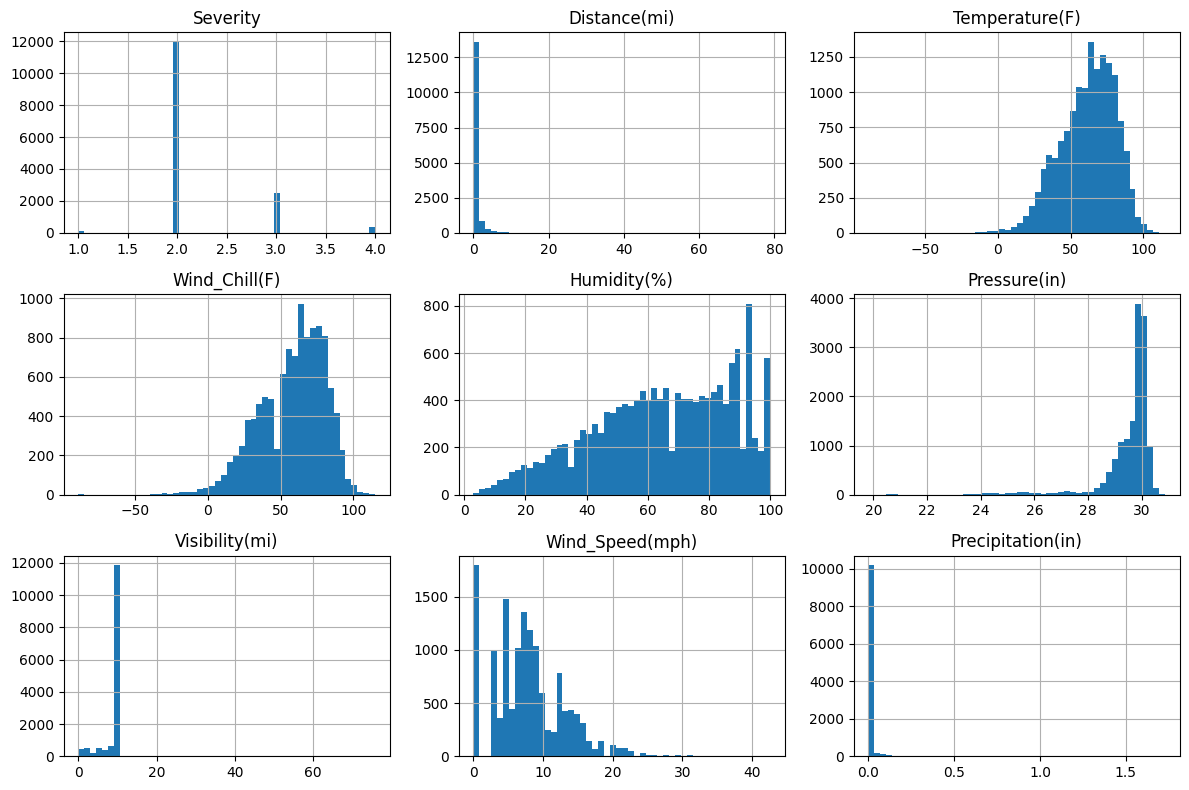

In [ ]:
numeric_columns = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

us_accidents[numeric_columns].hist(bins=50, figsize=(12, 8))
plt.tight_layout()

From this analysis, it can be observed that severity is mostly concentrated at a lower level, predominantly around level 2, indicating that the majority of accidents are relatively minor. Similarly, distance is clustered around shorter ranges, suggesting that accidents occur primarily in localized areas. In terms of temperature and wind chill, both show similar distributions, implying that accidents are more likely to occur under normal temperature conditions rather than in extreme cold or heat. However, humidity appears to increase with the number of accidents, suggesting that accidents are more frequent in high-humidity environments, such as during rain or fog, where visibility may be compromised. On the other hand, pressure, visibility, and wind speed show higher accident frequencies under normal values, while precipitation is generally low or non-existent in most cases. This indicates that precipitation might not be a significant factor in the majority of accidents.

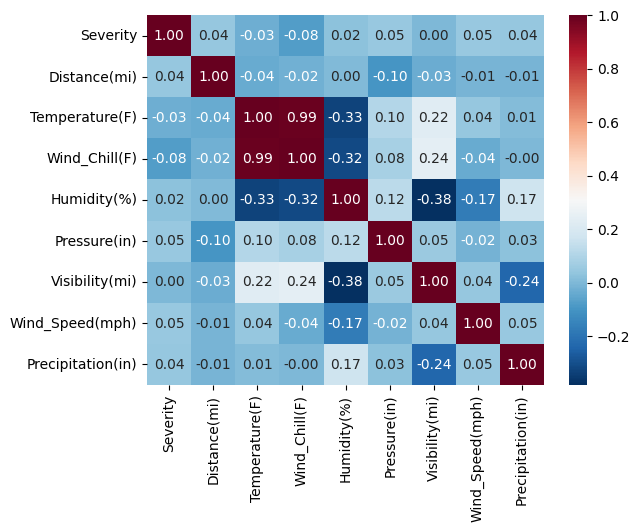

In [ ]:
corr_matrix = us_accidents[numeric_columns].corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r');

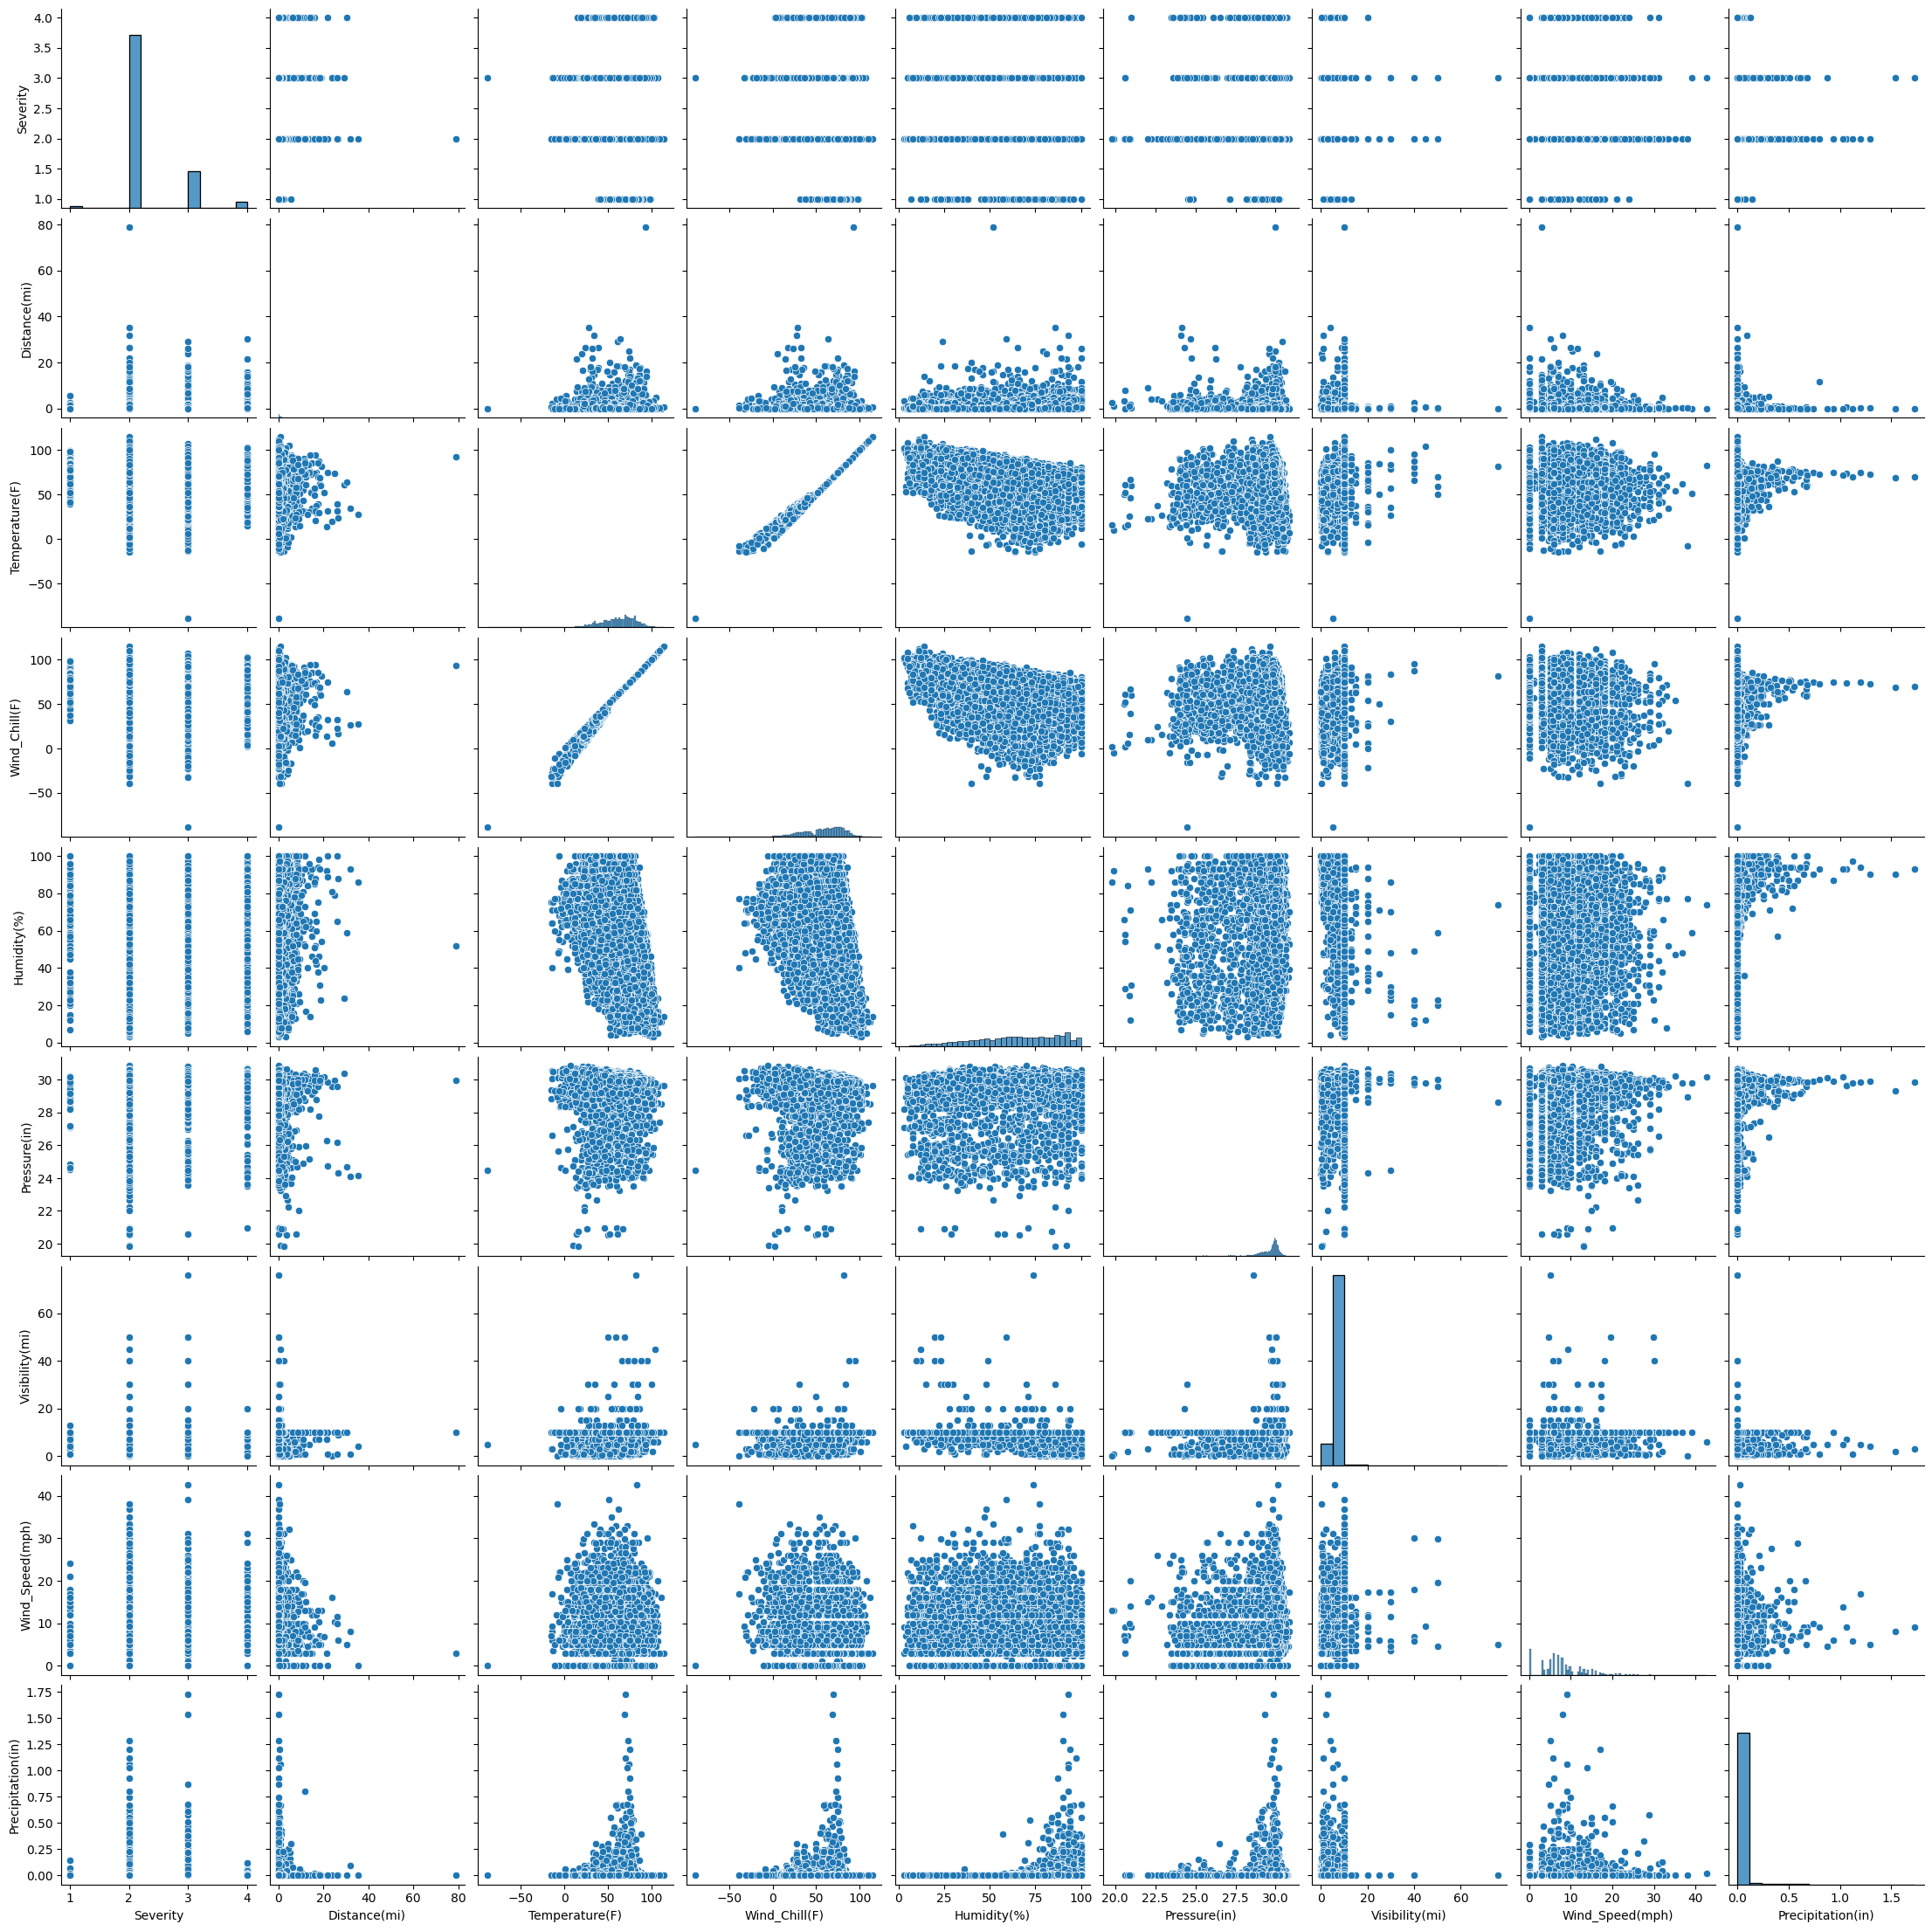

In [ ]:
sns.pairplot(us_accidents[numeric_columns])

When we analyzed the numerical values using a pairplot and correlation table, we observed that temperature and wind chill have a strong linear relationship, with a correlation of 0.99. Humidity shows a significant negative correlation with visibility (-0.38), which suggests that poor visibility is often associated with high humidity, such as in rain or fog. Additionally, precipitation has a weak negative correlation with visibility (-0.17), indicating that it slightly reduces visibility and may potentially contribute to accidents.


In [ ]:
state_accidents = us_accidents['State'].value_counts().reset_index()
state_accidents.columns = ['State', 'Accident_Count']

fig = px.choropleth(
    state_accidents,
    locations='State',
    locationmode='USA-states',
    color='Accident_Count',
    color_continuous_scale='Reds',
    scope='usa',
    title='Frequency Distribution of Accidents',
    labels = {'Accident_Count' : 'Number of Accidents'}
)

fig.show()

From the world map graph, it is evident that California has the highest number of car accidents compared to other states. Florida and Texas also report significantly high accident numbers. When analyzed by regions, East Coast states such as South Carolina, North Carolina, Virginia, and Pennsylvania also exhibit relatively high accident numbers. However, when seeing this graph, It is important to note that this data represents the absolute number of accidents, which may be influenced by the population size of these states. Since California, Florida, and Texas are highly populated, their accident numbers might appear disproportionately higher compared to other states.

In [ ]:
state_severity = us_accidents.groupby('State')['Severity'].mean().reset_index()
state_severity.columns = ['State', 'Average_Severity']

fig = px.choropleth(
    state_severity,
    locations='State',
    locationmode='USA-states',
    color='Average_Severity',
    color_continuous_scale='Blues',
    scope='usa',
    title='Average Severity of Accidents by State',
    labels={'Average_Severity': 'Avgerage Severity'}
)

fig.show()

When analyzing accident severity by state, the average severity differs significantly from the total number of accidents. States like California, Texas, and Florida have the most accidents but low average severity rates. In contrast, states like Wisconsin, Georgia, and parts of the Midwest report the highest average severity rates. This may be linked to high-speed driving in less populated areas with less traffic congestion, which increases the likelihood of severe accidents.

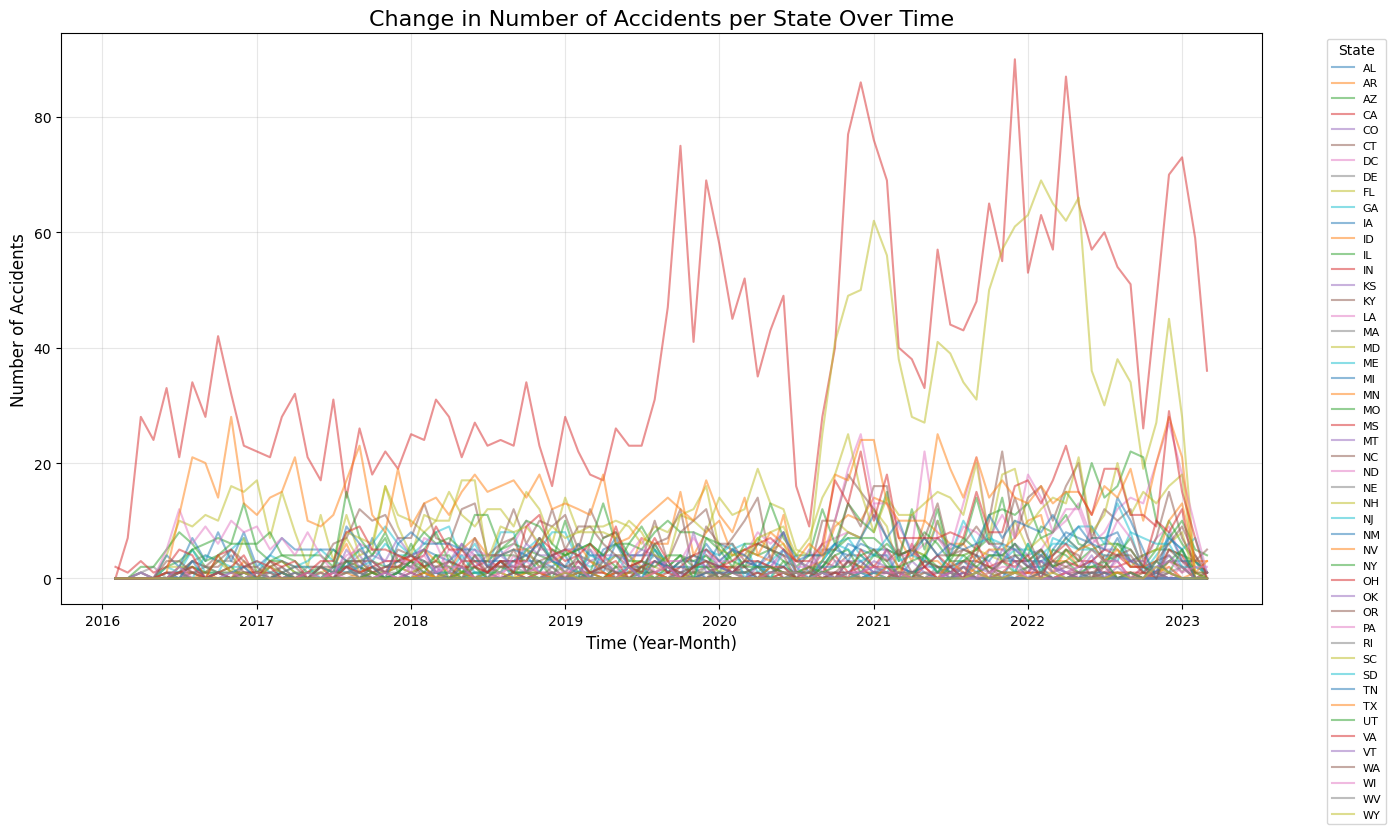

In [ ]:
us_accidents['Start_Time'] = pd.to_datetime(us_accidents['Start_Time'].str.split('.').str[0],errors='coerce')
us_accidents['Start_Time'] = pd.to_datetime(us_accidents['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

us_accidents['End_Time'] = pd.to_datetime(us_accidents['End_Time'].str.split('.').str[0],errors='coerce')
us_accidents['End_Time'] = pd.to_datetime(us_accidents['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

us_accidents['Year_Month'] = us_accidents['Start_Time'].dt.to_period('M')

accidents_trend = us_accidents.groupby(['State', 'Year_Month']).size().reset_index(name='Accident_Count')

accidents_trend_pivot = accidents_trend.pivot(index='Year_Month', columns='State', values='Accident_Count').fillna(0)

plt.figure(figsize=(14, 8))
for state in accidents_trend['State'].unique():
    plt.plot(accidents_trend_pivot.index.to_timestamp(), accidents_trend_pivot[state], label=state, alpha=0.5)

plt.title('Change in Number of Accidents per State Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title='State')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The line chart reveals a sharp rise in accidents across most states starting around June 2019, followed by a temporary decline in 2020. Afterward, accidents resumed their steep upward trend. Notably, Florida experienced substantial growth in accident numbers, particularly following California's sharp rebound. This surge placed Florida alongside California as the top two states with the highest accident numbers, both showing a distinct upward trend that sets them apart in accident frequency.

### 4.1 Data Cleaning

Before starting the machine learning process, we standardized column names, removed columns with uniform or excessive null values, and dropped specific rows with null values as part of the data cleaning process.

In [ ]:
#rename columns
us_accidents = us_accidents.rename(columns={'ID':'id','Source':'source','Severity':'severity','Start_Time':'start_time','End_Time':'end_time','Start_Lat':'start_lat','Start_Lng':'start_lng',
                             'End_Lat':'end_lat','End_Lng':'end_lng','Distance(mi)':'distance_mi','Description':'description','Street':'street','City':'city','County':'county','State':'state',
                             'Zipcode':'zipcode','Country':'country','Timezone':'timezone','Airport_Code':'airport_code','Weather_Timestamp':'weather_timestamp','Temperature(F)':'temperature_f',
                             'Wind_Chill(F)':'wind_chill_f','Humidity(%)':'humidity','Pressure(in)':'pressure_in','Visibility(mi)':'visibility_mi','Wind_Direction':'wind_direction','Wind_Speed(mph)':'wind_speed_mph',
                             'Precipitation(in)':'percipitation_in','Weather_Condition':'weather_condition','Amenity':'amenity','Bump':'bump','Crossing':'crossing','Give_Way':'give_way','Junction':'junction',
                             'No_Exit':'no_exit','Railway':'railway','Roundabout':'roundabout','Station':'station','Stop':'stop','Traffic_Calming':'traffic_calming','Traffic_Signal':'traffic_signal',
                             'Turning_Loop':'turning_loop','Sunrise_Sunset':'sunrise_sunset','Civil_Twilight':'civil_twilight','Nautical_Twilight':'nautical_twilight','Astronomical_Twilight':'astronomical_twilight'})

In [ ]:
#drop columns
us_accidents.drop(['id', 'source', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'description', 'county', 'airport_code','country', 'Year_Month'], axis=1, inplace=True)

In [ ]:
#check null values and drop rows
print(us_accidents.isnull().sum())
us_accidents.dropna(subset = ['street', 'city', 'zipcode', 'timezone'], axis = 0, inplace = True)

severity                    0
start_time                  0
end_time                    0
distance_mi                 0
street                     15
city                        1
state                       0
zipcode                     3
timezone                   14
weather_timestamp         238
temperature_f             330
wind_chill_f             3927
humidity                  354
pressure_in               277
visibility_mi             334
wind_direction            338
wind_speed_mph           1121
percipitation_in         4324
weather_condition         324
amenity                     0
bump                        0
crossing                    0
give_way                    0
junction                    0
no_exit                     0
railway                     0
roundabout                  0
station                     0
stop                        0
traffic_calming             0
traffic_signal              0
turning_loop                0
sunrise_sunset             50
civil_twil

In [ ]:
#time zone - US/Eastern Unify (US/Central + 1, US/Mountain + 2, US/Pacific +3)

def convert_to_eastern(row):
    start_time = pd.to_datetime(row['start_time'])
    end_time = pd.to_datetime(row['end_time'])
    timezone = row['timezone']

    if timezone == 'US/Central':
        start_time += pd.Timedelta(hours=1)
        end_time += pd.Timedelta(hours=1)
    elif timezone == 'US/Mountain':
        start_time += pd.Timedelta(hours=2)
        end_time += pd.Timedelta(hours=2)
    elif timezone == 'US/Pacific':
        start_time += pd.Timedelta(hours=3)
        end_time += pd.Timedelta(hours=3)

    return pd.Series([start_time, end_time])

us_accidents[['start_time_eastern', 'end_time_eastern']] = us_accidents.apply(convert_to_eastern, axis=1)

In [ ]:
#convert fahrenheit to celsius

def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5/9
    return celsius

us_accidents['temperature_c'] = us_accidents['temperature_f'].apply(fahrenheit_to_celsius)
us_accidents['wind_chill_c'] = us_accidents['wind_chill_f'].apply(fahrenheit_to_celsius)

In [ ]:
#miles > kilometers / inch > centimeters

us_accidents['distance_km'] = us_accidents['distance_mi'] * 1.60934
us_accidents['visibility_km'] = us_accidents['visibility_mi'] * 1.60934

us_accidents['percipitation_cm'] = us_accidents['percipitation_in'] * 2.54
us_accidents['pressure_cm'] = us_accidents['pressure_in'] * 2.54

us_accidents['wind_speed_kph'] = us_accidents['wind_speed_mph'] * 1.60934

us_accidents.drop(['distance_mi', 'visibility_mi', 'percipitation_in', 'pressure_in', 'wind_speed_mph'], axis = 1, inplace = True)

### 4.2 Feature Engineering

Additionally, for categorical columns with many unique values, we manually mapped them to numerical values and created additional columns as needed.

In [ ]:
weather_mapping = {
    'Clear': 1, 'Partly Cloudy': 1, 'Mostly Clear': 1,
    'Rain': 2, 'Light Rain': 2, 'Heavy Rain': 3,
    'Snow': 3, 'Fog': 2, 'Thunderstorm': 3
}
us_accidents['weather_risk'] = us_accidents['weather_condition'].map(weather_mapping).fillna(0)

# Severe_Weather flag
us_accidents['severe_weather'] = us_accidents['weather_risk'].apply(lambda x: 1 if x >= 2 else 0)

# Weather Impact Index
us_accidents['weather_impact_index'] = us_accidents['wind_speed_kph'] * us_accidents['percipitation_cm'] / (us_accidents['temperature_c'] + 1)

In [ ]:
# Time-based features
us_accidents['hour'] = us_accidents['start_time'].dt.hour
us_accidents['month'] = us_accidents['start_time'].dt.month
us_accidents['day_of_week'] = us_accidents['start_time'].dt.dayofweek

# Rush Hour feature
us_accidents['rush_hour'] = us_accidents['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 19 else 0)

# Light Condition flag
us_accidents['light_condition'] = us_accidents['sunrise_sunset'].apply(lambda x: 1 if x == 'Day' else 0)

### 4.3 Train/Test Set Split

In [ ]:
X = us_accidents.drop(['severity'], axis=1)
y = us_accidents['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.4 Pipelines

We defined a machine learning pipeline, `pre_pro_pipeline`, which integrates data preprocessing, feature selection, and oversampling. First, it uses a `ColumnTransformer` to preprocess numerical and categorical features separately: imputing missing values, scaling numerical data, and one-hot encoding categorical data. Next, it applies a `VarianceThreshold` step to remove low-variance features. A custom transformer, `SMOTEOnNumerical`, then applies BorderlineSMOTE to handle class imbalance by oversampling the numerical features. Finally, `RFE` (Recursive Feature Elimination) selects the top 20 features using logistic regression, optimizing the dataset for modeling.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import set_config
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.base import BaseEstimator, TransformerMixin

set_config(display='diagram')

datetime_columns = [col for col in X_train.columns if pd.api.types.is_datetime64_any_dtype(X_train[col])]
non_datetime_columns = [col for col in X_train.columns if col not in datetime_columns]

string_features = ['street', 'city', 'zipcode', 'county', 'timezone', 'airport_code', 'wind_direction', 'weather_condition']

numerical_features = [
    col for col in non_datetime_columns
    if X_train[col].nunique() > 50 and col not in string_features + ['id', 'weather_timestamp'] and not pd.api.types.is_period_dtype(X_train[col])
]

categorical_features = [
    col for col in non_datetime_columns
    if col not in numerical_features + ['id', 'weather_timestamp']
]

# Pipelines
numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)], remainder='drop')

# VarianceThreshold step
variance_threshold = VarianceThreshold(threshold=0.1)

# RFE feature selection
rfe = RFE(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    n_features_to_select=20
)

# Custom transformer to handle SMOTE resampling only on numerical features
class SMOTEOnNumerical(BaseEstimator, TransformerMixin):
    def __init__(self, smote):
        self.smote = smote

    def fit(self, X, y=None):

        return self

    def transform(self, X):
        return X

    def fit_resample(self, X, y):
        numerical_cols = X.select_dtypes(include=np.number).columns
        X_resampled, y_resampled = self.smote.fit_resample(X[numerical_cols], y)

        X_restored = pd.concat([X.reset_index(drop=True), X_resampled], axis=1)
        return X_restored, y_resampled

# Initialize SMOTE with custom logic
smote_transformer = SMOTEOnNumerical(smote=BorderlineSMOTE(random_state=42))

# Final pipeline
pre_pro_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', variance_threshold),
    ('smote', smote_transformer),
    ('rfe', rfe)
])
pre_pro_pipeline

<ipython-input-27-f1dd09b1f4bb>:24: DeprecationWarning:

is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['temperature_f',
                                                   'wind_chill_f', 'humidity',
                                                   'temperature_c',
                                                   'wind_chill_c',
                                                   'distance_km',
                                                   'percipitation_cm',
                                                   'pressure_cm',
                                                   'wind_speed_kph',
                                                   'weather_impact_index']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleIm...
                                                   'nautical_twilight',
                                                   'astronomical_twilight',
                                                   'visibility_km',
                                                   'weather_risk',
                                                   'severe_weather', 'hour',
                                                   'month', 'day_of_week', ...])])),
                ('variance_threshold', VarianceThreshold(threshold=0.1)),
                ('smote',
                 SMOTEOnNumerical(smote=BorderlineSMOTE(random_state=42))),
                ('rfe',
                 RFE(estimator=LogisticRegression(max_iter=1000,
                                                  random_state=42),
                     n_features_to_select=20))])

## **4. Machine Learning**

To fit the pipeline to the models, we combined the previously defined preprocessing steps (`pre_pro_pipeline`) with each classifier model. We applied K-fold cross-validation with 20 splits to evaluate the pipeline's performance on the training data. The process was configured to print the individual cross-validation scores as well as their mean, providing a reliable measure of each model's generalization performance. Since the focus is on classification, we tested Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Decision Trees to determine which model achieves the best performance.

### 4.1 Select and Train Model

4.1.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import BorderlineSMOTE

logistic_regression= LogisticRegression(random_state=42, max_iter=1000)

# Build the final pipeline with the updated preprocessor
final_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', logistic_regression),

])

# Cross-validation using the final pipeline
cv = KFold(n_splits=20, shuffle=True, random_state=42)
final_scores = cross_val_score(final_pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", final_scores)
print("Mean CV score:", final_scores.mean())

Cross-validation scores: [0.78797997 0.77128548 0.79465776 0.8096828  0.78130217 0.80634391
 0.81803005 0.80133556 0.80133556 0.80133556 0.79799666 0.79632721
 0.78130217 0.79298831 0.79632721 0.8163606  0.78595318 0.78428094
 0.81270903 0.76254181]
Mean CV score: 0.7950037967403868


The Logistic Regression model achieved a mean CV score of 0.7950, with scores ranging between 0.76 and 0.82. This indicates consistent and reliable performance with minimal variation across folds. The results suggest the model generalizes well to unseen data.

4.1.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Build the pipeline
rf_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', random_forest)
])

# Cross-validation
cv_rf = KFold(n_splits=20, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv_rf, scoring='accuracy')

print("Cross-validation scores (Random Forest):", rf_scores)
print("Mean CV score (Random Forest):", rf_scores.mean())

Cross-validation scores (Random Forest): [0.74624374 0.7345576  0.76794658 0.74624374 0.74457429 0.76794658
 0.75959933 0.73789649 0.78964942 0.76794658 0.75292154 0.76627713
 0.73288815 0.74123539 0.75459098 0.77796327 0.75250836 0.73578595
 0.77759197 0.72408027]
Mean CV score (Random Forest): 0.7539223678259754


The Random Forest model produced a lower mean CV score of 0.7539 compared to the Logistic Regression model. While Random Forest performed better on certain folds (e.g., 0.78), its scores varied more significantly, suggesting it may struggle to generalize consistently across different data splits.

4.1.3 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Build the pipeline
knn_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', knn)
])

# Cross-validation
cv_knn = KFold(n_splits=20, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=cv_knn, scoring='accuracy')

print("Cross-validation scores (KNN):", knn_scores)
print("Mean CV score (KNN):", knn_scores.mean())

Cross-validation scores (KNN): [0.75459098 0.75959933 0.76627713 0.77295492 0.76961603 0.78130217
 0.79465776 0.76293823 0.78464107 0.78464107 0.76794658 0.76961603
 0.76794658 0.75792988 0.76627713 0.78297162 0.76421405 0.77591973
 0.78762542 0.73745819]
Mean CV score (KNN): 0.7704561951077882


KNN achieved a mean CV score of 0.7705, showing improvement over the Random Forest but still trailing the base model. Its scores were relatively stable across folds, with a few higher-performing instances (e.g., ~0.78–0.79), indicating its performance is competitive but dependent on the neighborhood size and data distribution.

4.1.4 SVM

In [ ]:
from sklearn.svm import SVC

# Instantiate the Support Vector Classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', probability = True, random_state=42)

# Build the pipeline
svm_rbf_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', svm_rbf)
])

# Cross-validation
cv_svm_rbf = KFold(n_splits=10, shuffle=True, random_state=42)
svm_rbf_scores = cross_val_score(svm_rbf_pipeline, X_train, y_train, cv=cv_svm_rbf, scoring='accuracy')

print("Cross-validation scores (RBF SVM):", svm_rbf_scores)
print("Mean CV score (RBF SVM):", svm_rbf_scores.mean())


Cross-validation scores (RBF SVM): [0.78046745 0.80133556 0.79465776 0.8096828  0.80300501 0.79799666
 0.78780284 0.80701754 0.78362573 0.78947368]
Mean CV score (RBF SVM): 0.7955065041568864


The RBF SVM model achieved the highest mean CV score of 0.7955, marginally outperforming the base model. The scores were relatively consistent, ranging from 0.78 to 0.81, which demonstrates robust performance and good generalization capability. This result suggests RBF SVM is well-suited for the data, possibly due to its ability to handle complex, non-linear relationships.

4.1.5 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Build the pipeline
dt_pipeline = Pipeline([
    ('preprocessing', pre_pro_pipeline),
    ('classifier', decision_tree)
])

# Cross-validation
cv_dt = KFold(n_splits=20, shuffle=True, random_state=42)
dt_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=cv_dt, scoring='accuracy')

print("Cross-validation scores (Decision Tree):", dt_scores)
print("Mean CV score (Decision Tree):", dt_scores.mean())

Cross-validation scores (Decision Tree): [0.69449082 0.70283806 0.7278798  0.71953255 0.71786311 0.71619366
 0.71118531 0.71619366 0.72621035 0.7245409  0.70617696 0.71452421
 0.68113523 0.70450751 0.71118531 0.72954925 0.68561873 0.69732441
 0.73076923 0.68896321]
Mean CV score (Decision Tree): 0.7103341131540304


The Decision Tree model performed the weakest, with a mean CV score of 0.7103. The scores fluctuated significantly between 0.68 and 0.73, indicating the model is prone to overfitting and struggles with generalization. Due to such a low mean CV score, it makes more sense to provide more focus on fine tuning the other models as compared to this model.

### 4.2 Fine-Tune

To adjust the hyper-parameter for each model, we have decided to use 'Random Search' for every model.

In [ ]:
from sklearn.experimental import enable_halving_search_cv

In [ ]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


4.2.1 Logistic Regression

The chosen hyperparameters for logistic regression focus on optimizing regularization, convergence, and solver behavior. The regularization parameter C (spanning a wide range) controls the trade-off between fitting the training data and generalizing to unseen data. The penalty is fixed to l2 as it is commonly used for regularization in logistic regression. The solvers lbfgs and saga are efficient for large datasets and support l2 regularization. Finally, max_iter ensures the solver has enough iterations to converge, especially for complex datasets.

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
import numpy as np

# Define parameter grid for Logistic Regression
param_distributions_lr = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'saga'],
    'classifier__max_iter': [200, 500]
}

# HalvingRandomSearchCV
halving_random_search_lr = HalvingRandomSearchCV(
    estimator=final_pipeline,
    param_distributions=param_distributions_lr,
    factor=3,
    scoring='accuracy',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the Halving Random Search
halving_random_search_lr.fit(X_train, y_train)

# Output the results
print("Best parameters (Logistic Regression):", halving_random_search_lr.best_params_)
print("Best score (Logistic Regression):", halving_random_search_lr.best_score_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 6
min_resources_: 24
max_resources_: 11976
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 80
n_resources: 24
Fitting 3 folds for each of 80 candidates, totalling 240 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 80 is smaller than n_iter=499. Running 80 iterations. For exhaustive searches, use GridSearchCV.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Conv

----------
iter: 1
n_candidates: 27
n_resources: 72
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

----------
iter: 2
n_candidates: 9
n_resources: 216
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 3
n_candidates: 3
n_resources: 648
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters (Logistic Regression): {'classifier__solver': 'saga', 'classifier__penalty': 'l2', 'classifier__max_iter': 200, 'classifier__C': 0.0018329807108324356}
Best score (Logistic Regression): 0.7993827160493826


After hyperparameter tuning, the Logistic Regression model achieved a **best score of 0.7994**, compared to its previous mean cross-validation score of **0.7950**. The tuned model used the **'saga' solver**, an **L2 penalty**, **200 iterations**, and a regularization strength of **C = 0.00183**. This slight improvement in performance suggests that tuning the model parameters helped optimize its ability to generalize, albeit with a modest gain. The results demonstrate that while the baseline Logistic Regression model was already performing well, fine-tuning enhanced its performance further, likely by balancing regularization and convergence.

4.2.2 Random Forest

The hyperparameters for the random forest model are selected to optimize both the structure of individual trees and the overall ensemble behavior. The `n_estimators` parameter controls the number of trees in the forest, balancing computational cost and model performance. The `max_depth` parameter limits the depth of each tree, preventing overfitting by restricting how specific the splits can become. Parameters like `min_samples_split` and `min_samples_leaf` influence the splitting and size of the leaf nodes, ensuring that tree branches remain balanced and that splits occur only when sufficient data is available. The `bootstrap` parameter determines whether sampling with replacement is used, which impacts the diversity and robustness of the model by introducing variability in the training datasets for each tree.

In [ ]:
# Define parameter grid for Random Forest
param_distributions_rf = {
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Halving Randomized Search
halving_random_search_rf = HalvingRandomSearchCV(
    rf_pipeline,
    param_distributions=param_distributions_rf,
    factor=3,
    scoring='accuracy',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the Halving Randomized Search
halving_random_search_rf.fit(X_train, y_train)

# Output the results
print("Best parameters (Halving Random Forest):", halving_random_search_rf.best_params_)
print("Best score (Halving Random Forest):", halving_random_search_rf.best_score_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 24
max_resources_: 11976
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 288
n_resources: 24
Fitting 3 folds for each of 288 candidates, totalling 864 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 288 is smaller than n_iter=499. Running 288 iterations. For exhaustive searches, use GridSearchCV.

/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



----------
iter: 1
n_candidates: 96
n_resources: 72
Fitting 3 folds for each of 96 candidates, totalling 288 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



----------
iter: 2
n_candidates: 32
n_resources: 216
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



----------
iter: 3
n_candidates: 11
n_resources: 648
Fitting 3 folds for each of 11 candidates, totalling 33 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



----------
iter: 4
n_candidates: 4
n_resources: 1944
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



----------
iter: 5
n_candidates: 2
n_resources: 5832
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best parameters (Halving Random Forest): {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10, 'classifier__bootstrap': True}
Best score (Halving Random Forest): 0.7928669410150891


After parameter tuning, the **Halving Random Search for the Random Forest model** yielded a best score of **0.7929** with the optimized parameters: `n_estimators=200`, `min_samples_split=2`, `min_samples_leaf=4`, `max_depth=10`, and `bootstrap=True`. This represents a significant improvement over the untuned Random Forest model, which had a mean CV score of **0.7539**. Despite this improvement, the tuned Random Forest still performs slightly below the **Logistic Regression** model, which achieved a mean CV score of **0.7950**. This suggests that while parameter tuning has helped close the performance gap, the simpler Logistic Regression model remains more effective on this dataset, likely due to its ability to generalize better with fewer hyperparameters and reduced risk of overfitting.

4.2.3 KNN

The KNN hyperparameters are chosen to fine-tune the model's distance-based classification. The `n_neighbors` parameter specifies the number of nearest data points considered for prediction, balancing bias (with higher values) and variance (with lower values). The `weights` parameter determines whether all neighbors contribute equally to the prediction or if their influence is weighted by their distance, allowing the model to prioritize closer neighbors. The `metric` parameter defines the method used to calculate distances (e.g., Euclidean, Manhattan), enabling the model to adapt to various data distributions and geometries for improved performance.

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Define parameter grid for KNN
param_distributions_knn = {
    'classifier__n_neighbors': list(range(1, 30)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Halving Randomized Search
halving_random_search_knn = HalvingRandomSearchCV(
    knn_pipeline,
    param_distributions=param_distributions_knn,
    factor=5,
    scoring='accuracy',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the Halving Randomized Search
halving_random_search_knn.fit(X_train, y_train)

# Output the results
print("Best parameters (Halving KNN):", halving_random_search_knn.best_params_)
print("Best score (Halving KNN):", halving_random_search_knn.best_score_)


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 24
max_resources_: 11976
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 174
n_resources: 24
Fitting 3 folds for each of 174 candidates, totalling 522 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 174 is smaller than n_iter=499. Running 174 iterations. For exhaustive searches, use GridSearchCV.

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/m

----------
iter: 1
n_candidates: 35
n_resources: 120
Fitting 3 folds for each of 35 candidates, totalling 105 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.

----------
iter: 2
n_candidates: 7
n_resources: 600
Fitting 3 folds for each of 7 candidates, totalling 21 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.

----------
iter: 3
n_candidates: 2
n_resources: 3000
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.

Best parameters (Halving KNN): {'classifier__weights': 'uniform', 'classifier__n_neighbors': 15, 'classifier__metric': 'euclidean'}
Best score (Halving KNN): 0.7967967967967969


After hyperparameter tuning, the **Halving KNN** model achieved a best mean cross-validation score of **0.7968** using the following parameters: **n_neighbors=15**, **weights='uniform'**, and **metric='euclidean'**. This is a significant improvement over the initial KNN model, which had a mean CV score of **0.7705**. Interestingly, the tuned KNN model now performs at a level comparable to the **Logistic Regression** model, whose mean CV score was **0.7950**. This result suggests that KNN, when optimized, can match or even slightly outperform Logistic Regression, particularly when the distance metric and neighborhood size are carefully selected. This highlights the importance of hyperparameter tuning in improving KNN's performance and its ability to generalize effectively on the dataset.

4.2.4 SVM with RBF Kernel

The hyperparameters for the SVM with the RBF kernel are designed to optimize the model's complexity and decision boundaries. The regularization parameter `C` controls the trade-off between achieving a larger margin and improving classification accuracy, with higher values focusing on correct classification of training examples and lower values promoting a wider margin. The `gamma` parameter determines the influence range of individual training examples, affecting the smoothness and complexity of the decision boundary. Using values like scale or auto for gamma simplifies tuning across datasets with varying feature scales. Additionally, exploring a logarithmic range for both `C` and `gamma` ensures a thorough and efficient search for the optimal combination of these parameters.

In [ ]:
param_distributions_svm_rbf = {
    'classifier__C': np.logspace(-3, 3, 10),  # Regularization parameter
    'classifier__gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 10))  # Kernel coefficient
}

# Halving Randomized Search
halving_random_search_svm_rbf = HalvingRandomSearchCV(
    svm_rbf_pipeline, param_distributions=param_distributions_svm_rbf,
    factor=3,  # Reduction factor for halving
    scoring='accuracy',
    cv=5,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

halving_random_search_svm_rbf.fit(X_train, y_train)

# Output the results
print("Best parameters (Halving RBF SVM):", halving_random_search_svm_rbf.best_params_)
print("Best score (Halving RBF SVM):", halving_random_search_svm_rbf.best_score_)


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 6
min_resources_: 40
max_resources_: 11976
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 40
Fitting 5 folds for each of 120 candidates, totalling 600 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 120 is smaller than n_iter=299. Running 120 iterations. For exhaustive searches, use GridSearchCV.



----------
iter: 1
n_candidates: 40
n_resources: 120
Fitting 5 folds for each of 40 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 14
n_resources: 360
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 3
n_candidates: 5
n_resources: 1080
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 3240
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters (Halving RBF SVM): {'classifier__gamma': 'auto', 'classifier__C': 2.154434690031882}
Best score (Halving RBF SVM): 0.7972851909096114


After parameter tuning, the **RBF SVM** model achieved a **best score of 0.7973** using optimized parameters: `'gamma': 'auto'` and `'C': 2.15`. This is a slight improvement over its original mean CV score of **0.7955**, demonstrating that fine-tuning the model's hyperparameters enhanced its performance. When compared to the **Logistic Regression** model, which had a mean CV score of **0.7950**, the tuned RBF SVM shows a marginal but consistent edge. This indicates that while Logistic Regression performs robustly, the RBF SVM—with its ability to model non-linear relationships—achieves slightly better generalization on this dataset.

### 4.3 Evalute Test Set

For our evaluation, we have decided to use ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) as our evaluation metric in the provided code to assess the model's ability to rank predictions. Here's how it is applied:

1. Label Binarization: Since the problem involves multiple classes, the LabelBinarizer is used to transform the ground truth labels (y_test) into a binary format. This allows for calculating the ROC-AUC score in a one-vs-rest (OVR) manner, where each class is evaluated as the positive class against all others.

2.  Probability Predictions: The predict_proba method of the logistic regression model is used to generate predicted probabilities for each class. These probabilities are preferred over direct class predictions (y_pred) because ROC-AUC evaluates the model's ability to rank predictions by their likelihood, rather than their accuracy in classification.

3. ROC-AUC Calculation: The roc_auc_score function calculates the ROC-AUC score using the binarized true labels (y_test_bin) and the predicted probabilities (y_pred_prob). The parameters average='macro' and multi_class='ovr' are applied for multi-class evaluation:
  * average='macro' ensures that the ROC-AUC score is calculated independently for each class and then averaged equally, giving all classes the same weight, regardless of their prevalence.
  * multi_class='ovr' treats each class as the positive class (and all other classes as negative), calculating a separate ROC-AUC score for each binary classification task.

By combining these parameters, the evaluation provides a comprehensive view of the model's performance across all classes. It ensures that the assessment is not biased toward any specific class, even in scenarios with class imbalance. This makes ROC-AUC a robust metric for multi-class classification problems.

4.3.1 Logistic Regression

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Evaluate Logistic Regression Model
def evaluate_logistic_regression():
    best_model = halving_random_search_lr.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    # ROC-AUC score (multi-class)
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

    # Output evaluation results
    print("Logistic Regression Evaluation:")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Call the function
evaluate_logistic_regression()

Logistic Regression Evaluation:
ROC-AUC: 0.6777


4.3.2 Random Forest

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Evaluate Random Forest Model
def evaluate_random_forest():
    best_model = halving_random_search_rf.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    # ROC-AUC score (multi-class)
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

    # Output evaluation results
    print("Random Forest Evaluation:")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Call the function
evaluate_random_forest()


Random Forest Evaluation:
ROC-AUC: 0.8244


4.3.3 KNN

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Evaluate KNN Model
def evaluate_knn():
    best_model = halving_random_search_knn.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    # ROC-AUC score (multi-class)
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

    # Output evaluation results
    print("KNN Evaluation:")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Call the function
evaluate_knn()


KNN Evaluation:
ROC-AUC: 0.6480


4.3.4 SVM with RBF Kernel

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Evaluate SVM Model
def evaluate_svm():
    best_model = halving_random_search_svm_rbf.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)

    # ROC-AUC score (multi-class)
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

    # Output evaluation results
    print("SVM Evaluation:")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Call the function
evaluate_svm()

SVM Evaluation:
ROC-AUC: 0.6648


## **5. Conclusion**

### 5.1 Conclusion

Our analysis revealed that while Logistic Regression and SVM achieved similar accuracy (~0.796), the Random Forest model stood out with the highest ROC-AUC (0.8244), making it the most suitable choice for this classification task. This highlights the value of ensemble methods like Random Forest, which balance generalization and robustness, ensuring consistent performance across diverse and noisy datasets. Additionally, the analysis underscored the importance of selecting evaluation metrics that align with the task's objectives. The superior ROC-AUC of Random Forest, compared to the similar accuracies of other models, demonstrates its ability to effectively differentiate between classes. Its resilience to imbalanced datasets and ability to provide feature importance insights further establish it as a top-performing and practical tool for real-world decision-making, particularly in applications like road safety and emergency response optimization. In traffic management, Random Forest can analyze real-time data to predict accident risks, enabling authorities to issue warnings and improve road design to prevent accidents. Similarly, in emergency response, the model can predict the severity of accidents to help prioritize resources, such as dispatching ambulances or fire trucks to critical cases, reducing response times. For instance, some cities integrate traffic and emergency systems to prioritize ambulance routes based on predicted accident severity, demonstrating how machine learning models like Random Forest can address critical challenges effectively.

In traffic management, Random Forest can analyze real-time data to predict accident risks, enabling authorities to issue warnings and improve road design to prevent accidents. Similarly, in emergency response, the model can predict the severity of accidents to help prioritize resources, such as dispatching ambulances or fire trucks to critical cases, reducing response times. For instance, some cities integrate traffic and emergency systems to prioritize ambulance routes based on predicted accident severity. By applying these solutions in states like Wisconsin, Georgia, and the Midwest, where accident fatality rates are high, significant cost reductions and prevention of injuries can be achieved. The ability to proactively mitigate risks and optimize resource allocation underscores the transformative potential of Random Forest in reducing human and financial losses in high-risk areas.

### 5.2 Challenges


The original dataset, containing over 7 million rows and approximately 3 GB in size, caused frequent notebook crashes during the machine learning and fine-tuning phases. To address this, we applied stratified sampling, reducing the dataset to around 15,000 rows, enabling smoother execution. However, the reduced sample size introduced challenges, such as identical outputs across all fine-tuning methods (random, grid, and Bayesian searches), likely due to the smaller dataset size, imbalanced class distribution, and the explosion of features caused by one-hot encoding of categorical variables. To mitigate these issues, we incorporated SMOTE into the pipeline to address data imbalance and improve model performance. Additionally, time series data used in the EDA caused errors in the pipeline. We resolved this by converting the datetime64 type into distinct columns and excluding it from the pipeline to prevent compatibility issues.


### 5.3 References

* Smote: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

* Data Imbalance: https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

* Data Compression: https://dagster.io/glossary/data-compression

* Accident Rates in USA: https://injuryfacts.nsc.org/motor-vehicle/historical-fatality-trends/deaths-and-rates/#:~:text=The%20current%20rate%20is%2013.8,vehicles%2C%20a%2095%25%20improvement.

* Reason of Car Accidents: https://ezautospa.com/25141/13-updated-georgia-car-accident-statistics/#:~:text=Georgia%20is%20the%208th%20most,accidents%20as%20of%20February%202022.

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

### 5.4 Generative AI

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:
          
* Content Generation: We used ChatGPT to brainstorm ideas and structure the initial outline of the project. The AI helped us refine our thesis statement and suggested key points to include in each section.
* Research Assistance: ChatGPT was used to summarize research articles and generate concise overviews of relevant topics, helping us better understand and integrate complex concepts.
* Code Review and Debugging: ChatGPT suggested ways to improve our Python code, including optimizing algorithms and resolving potential errors.
* Proofreading and Grammar Checks: We used QuillBot AI to refine our writing, improve readability, and ensure grammatical accuracy.

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.
